# Imaging Experiments



In [1]:
from liftout.fibsem import acquire
from liftout.fibsem import utils as fibsem_utils


from liftout.fibsem.acquire import BeamType

ip_address = "10.0.0.1"
microscope = fibsem_utils.initialise_fibsem(ip_address=ip_address)





Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


In [2]:
gamma_dict = {
  "correction": True,
  "min_gamma": 0.15,
  "max_gamma": 1.8,
  "scale_factor": 0.01,
  "threshold": 46,
}
image_settings = {}
image_settings["resolution"] = "1536x1024" 
image_settings["dwell_time"] = 1e-6
image_settings["hfw"] = 100e-6
image_settings["autocontrast"] = True
image_settings["beam_type"] = BeamType.ELECTRON
image_settings["gamma"] = gamma_dict 
image_settings["save"] = False
image_settings["label"] = ""
image_settings["save_path"] = None

print(image_settings)

{'resolution': '1536x1024', 'dwell_time': 1e-06, 'hfw': 0.0001, 'autocontrast': True, 'beam_type': <BeamType.ELECTRON: 1>, 'gamma': {'correction': True, 'min_gamma': 0.15, 'max_gamma': 1.8, 'scale_factor': 0.01, 'threshold': 46}, 'save': False, 'label': '', 'save_path': None}


In [7]:
eb_image, ib_image = acquire.take_reference_images(microscope, image_settings)
print(f"Working distance: {eb_image.metadata.optics.working_distance}")
print(f"Stage Position : {eb_image.metadata.stage_settings.stage_position}")
print(f"Eucentric Working Distance:  {eb_image.metadata.optics.eucentric_working_distance}")

print(f"Current Stage Position: {microscope.specimen.stage.current_position.z}")



# COOORDIANTE SYTEM IS DIFFERENT (stage_position = raw)
link_difference = abs(eb_image.metadata.optics.eucentric_working_distance - eb_image.metadata.optics.working_distance)

print(f"Link Difference: {link_difference}")
      
    
# # focus and link
print("\nFOCUS AND LINK")
microscope.imaging.set_active_view(1) # set to Ebeam

microscope.auto_functions.run_auto_focus()
microscope.specimen.stage.link()



eb_image, ib_image = acquire.take_reference_images(microscope, image_settings)
print(f"\nWorking distance: {eb_image.metadata.optics.working_distance}")
print(f"Stage Position : {eb_image.metadata.stage_settings.stage_position}")
print(f"Eucentric Working Distance:  {eb_image.metadata.optics.eucentric_working_distance}")

print(f"Current Stage Position: {microscope.specimen.stage.current_position.z}")


# COOORDIANTE SYTEM IS DIFFERENT (stage_position = raw)
link_difference = abs(eb_image.metadata.optics.eucentric_working_distance - eb_image.metadata.optics.working_distance)

print(f"Link Difference: {link_difference}")

Working distance: 0.0052041859567906424
Stage Position : StagePosition(x=0.0029907083, y=0.0032309583, z=0.005204186, t=-7.80505e-07, r=0.87244571, coordinate_system=specimen)
Eucentric Working Distance:  0.004
Current Stage Position: 0.0052041859567906424
Link Difference: 0.0012041859567906424


In [85]:
from autoscript_sdb_microscope_client.structures import *

from autoscript_sdb_microscope_client.enumerations import CoordinateSystem
microscope.specimen.stage.set_default_coordinate_system(CoordinateSystem.SPECIMEN)

stage_settings = MoveSettings(rotate_compucentric=True)
# microscope.specimen.stage.absolute_move(StagePosition(z=4e-3), stage_settings)



{'resolution': '768x512', 'dwell_time': 3e-07, 'hfw': 5e-05, 'autocontrast': True, 'beam_type': <BeamType.ELECTRON: 1>, 'gamma': {'correction': True, 'min_gamma': 0.15, 'max_gamma': 1.8, 'scale_factor': 0.01, 'threshold': 46}, 'save': False, 'label': '', 'save_path': None}
Initial:  0.004
Img 0: 0.00350


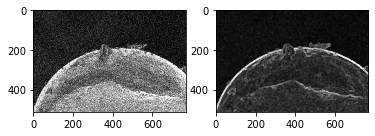

Img 1: 0.00375


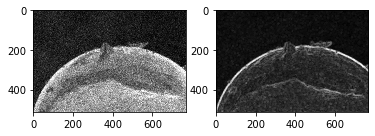

Img 2: 0.00400


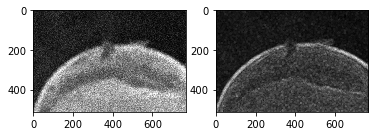

Img 3: 0.00425


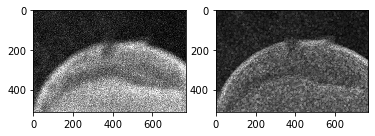

Img 4: 0.00450


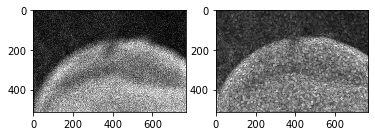

(0.0035, 43.16336568196615) (0.00375, 41.76545206705729) (0.004, 38.888206481933594) (0.00425, 38.36652628580729) (0.0045000000000000005, 38.050374348958336)
0 0.0035 43.16336568196615


In [138]:
%load_ext autoreload
%autoreload 2

auto_focus_and_link()

# https://en.wikipedia.org/wiki/Acutance?

# auto_focus
# set working distance (+-300um)
# take 5 images
# calculate_focus (sharpeness metric)
# pick best sharpness
# return

### Coordinate System Test

In [152]:


microscope.specimen.stage.set_default_coordinate_system(CoordinateSystem.SPECIMEN)
print(microscope.specimen.stage.current_position)


microscope.specimen.stage.set_default_coordinate_system(CoordinateSystem.RAW)
print(microscope.specimen.stage.current_position)

StagePosition(x=0.0029907083,y=0.0032309583,z=0.0035,t=-7.80505e-07,r=0.87244571)
StagePosition(x=0.00247775,y=0.00402475,z=0.031836581,t=-7.80505e-07,r=0.85495468)


In [9]:

from autoscript_sdb_microscope_client.structures import *

from autoscript_sdb_microscope_client.enumerations import CoordinateSystem
microscope.specimen.stage.set_default_coordinate_system(CoordinateSystem.SPECIMEN)

stage_settings = MoveSettings(rotate_compucentric=True)
microscope.specimen.stage.absolute_move(StagePosition(z=6e-3), stage_settings)

### Insert Needle to position test


In [19]:
from autoscript_sdb_microscope_client.enumerations import *


needle =  microscope.specimen.manipulator
park_position = needle.get_saved_position(ManipulatorSavedPosition.PARK, ManipulatorCoordinateSystem.STAGE)


position = needle.current_position

print(park_position)
print(position)


ManipulatorPosition(x=0, y=1.56101e-10, z=0.0002, coordinate_system=Stage)
ManipulatorPosition(x=-1.8750987e-05, y=-6.5116099e-07, z=0.00019889994, r=0, coordinate_system=Stage)


ManipulatorPosition(x=0, y=1.56101e-10, z=0.0002, coordinate_system=Stage)
ManipulatorPosition(x=-1.8750987e-05, y=-6.5116099e-07, z=0.00019889994, r=0, coordinate_system=Stage)
ManipulatorPosition(x=5.869052e-07, y=2.3228956e-08, z=0.00019957613, r=0, coordinate_system=Stage)
